In [81]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob

[nltk_data] Downloading package stopwords to c:\users\nicholas
[nltk_data]     rizzo\python\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
#Load dataset 
data = load_dataset("rotten_tomatoes", split='validation')

#Make dataset a dataframe
df = pd.DataFrame(data)
df.head()

Using custom data configuration default
Reusing dataset rotten_tomatoes_movie_review (C:\Users\Nicholas Rizzo\.cache\huggingface\datasets\rotten_tomatoes_movie_review\default\1.0.0\40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46)


,text,label
0,compassionately explores the seemingly irrecon...,1
1,the soundtrack alone is worth the price of adm...,1
2,rodriguez does a splendid job of racial profil...,1
3,beneath the film's obvious determination to sh...,1
4,bielinsky is a filmmaker of impressive talent .,1


In [67]:
#Calculate total words
df['totalwords'] = [len(x.split()) for x in df['text'].tolist()]

#Seperate dataset into neagtive and positive dataset
df1 = df[df['label'] == 1]
df0 = df[df['label'] == 0]

Text(0.5, 1.0, 'Histogram of Word Count all Reviews')

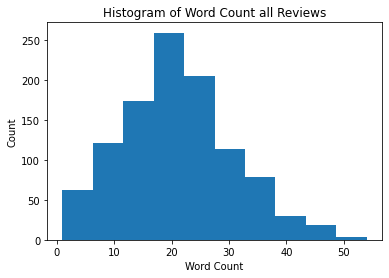

In [88]:
#Create plot
plt.hist(x=df['totalwords'])
plt.xlabel('Word Count') 
plt.ylabel('Count') 
plt.title("Histogram of Word Count all Reviews")

Text(0.5, 1.0, 'Histogram of Word Count Positive Reviews')

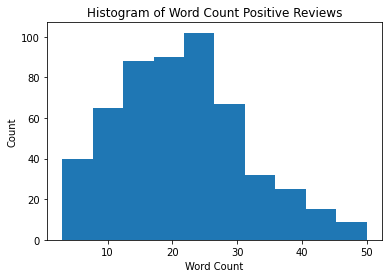

In [90]:
#Create plot
plt.hist(x=df1['totalwords'])
plt.xlabel('Word Count') 
plt.ylabel('Count') 
plt.title("Histogram of Word Count Positive Reviews")

Text(0.5, 1.0, 'Histogram of Word Count Negative Reviews')

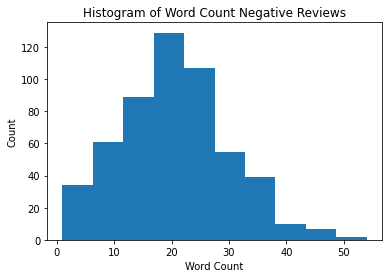

In [91]:
#Create plot
plt.hist(x=df0['totalwords'])
plt.xlabel('Word Count') 
plt.ylabel('Count') 
plt.title("Histogram of Word Count Negative Reviews")

In [71]:
#Show stats for positive total words
df1['totalwords'].describe()

count    533.000000
mean      21.440901
std        9.849945
min        3.000000
25%       14.000000
50%       21.000000
75%       27.000000
max       50.000000
Name: totalwords, dtype: float64

In [72]:
#Show stats for negative total words
df0['totalwords'].describe()

count    533.000000
mean      20.553471
std        9.413609
min        1.000000
25%       13.000000
50%       20.000000
75%       26.000000
max       54.000000
Name: totalwords, dtype: float64

In [73]:
#Function to clean data
def review_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [74]:
#Apply clean function to positive and negative datasets
df1['text']=df1['text'].apply(lambda x:review_cleaning(x))
df0['text']=df0['text'].apply(lambda x:review_cleaning(x))

<ipython-input-74-9b094fe74f5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text']=df1['text'].apply(lambda x:review_cleaning(x))
<ipython-input-74-9b094fe74f5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['text']=df0['text'].apply(lambda x:review_cleaning(x))


In [76]:
#create columns with no stop words
stop=stopwords.words('english')
df1['text_no_stopwords'] = df1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df0['text_no_stopwords'] = df0['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

<ipython-input-76-241f51467fd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text_no_stopwords'] = df1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
<ipython-input-76-241f51467fd3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['text_no_stopwords'] = df0['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [79]:
#Show top words in positive dataset
Counter(" ".join(df1["text_no_stopwords"]).split()).most_common(10)

[('film', 108),
 ('movie', 47),
 ('one', 44),
 ('like', 29),
 ('story', 29),
 ('good', 23),
 ('us', 21),
 ('funny', 21),
 ('much', 21),
 ('little', 21)]

In [80]:
#Show top words in negative dataset
Counter(" ".join(df0["text_no_stopwords"]).split()).most_common(10)

[('movie', 72),
 ('film', 58),
 ('like', 37),
 ('one', 36),
 ('much', 30),
 ('comedy', 24),
 ('story', 22),
 ('little', 22),
 ('good', 21),
 ('movies', 20)]

In [85]:
#Create polarity column for both datasets
df1['polarity'] = df1['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df0['polarity'] = df0['text'].map(lambda text: TextBlob(text).sentiment.polarity)

<ipython-input-85-bcbcbb56401d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['polarity'] = df1['text'].map(lambda text: TextBlob(text).sentiment.polarity)
<ipython-input-85-bcbcbb56401d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['polarity'] = df0['text'].map(lambda text: TextBlob(text).sentiment.polarity)


Text(0.5, 1.0, 'Histogram of Polarity for Positive Reviews')

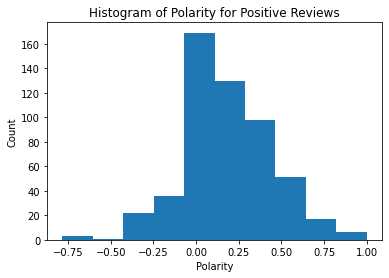

In [92]:
#Create plot
plt.hist(x=df1['polarity'])
plt.xlabel('Polarity') 
plt.ylabel('Count') 
plt.title("Histogram of Polarity for Positive Reviews")

Text(0.5, 1.0, 'Histogram of Polarity for Negative Reviews')

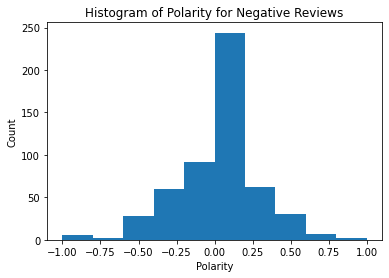

In [93]:
#Create plot
plt.hist(x=df0['polarity'])
plt.xlabel('Polarity') 
plt.ylabel('Count') 
plt.title("Histogram of Polarity for Negative Reviews")